<a href="https://colab.research.google.com/github/alikhosravi/Spatial-Accessibility/blob/main/OSMNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

In [ ]:
G = ox.graph_from_place('Arak, Markazi, Iran', network_type='drive')
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
center_node = ox.distance.nearest_nodes(G, 49.705401951953874, 34.0751695051128, return_dist=False)
subgraph = nx.ego_graph(G, center_node, radius=1000, distance='length')
subgraph.edges
#G.nodes[4088938506]
Corr = list()
for node in subgraph.nodes:
  n = G.nodes[node]
  Corr.append([n['y'], n['x']])
subgraph.edges
#G_prj = ox.projection.project_graph(G, to_crs="EPSG:32639")
#G_prj.nodes[4088938506]


In [ ]:
Polylines = list()
for edge in subgraph.edges:
  Corr = list()
  for corner in edge[:2]:
    n = G.nodes[corner]
    Corr.append([n['y'], n['x']])
    Polylines.append(Corr)

In [ ]:
Polylines

In [ ]:
import folium
import osmnx as ox
import networkx as nx
ox.config(use_cache=True, log_console=True)

#G = ox.graph_from_point((34.0751695051128, 49.705401951953874), dist=3000, network_type='walk')
G = ox.graph_from_place('Arak, Markazi, Iran', network_type='drive')
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)


orig = ox.get_nearest_node(G, (34.0751695051128, 49.705401951953874))
dest = ox.get_nearest_node(G, (34.07359578536033, 49.70597876633484))
route = nx.shortest_path(G, orig, dest, 'travel_time')
route_map = ox.plot_route_folium(G, route)
route_map

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [ ]:
import fiona
from shapely.geometry import Polygon
aoi = fiona.open('Region4.shp')
aoiGeom = Polygon(aoi[0]['geometry']['coordinates'][0])
aoiGeom

In [ ]:
ox.utils.config(default_crs="epsg:4326")
G =ox.graph_from_place('Arak, Markazi, Iran')

In [ ]:
route_map._repr_html_()

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
gdb_file= '/content/drive/My Drive/Isfahan/MyGeodatabase.gdb'
Blocks = gpd.read_file('/content/drive/My Drive/Isfahan/Inputs/block.gpkg')
Blocks.drop(['code',	'zone',	'Shape_Area',	'Mahalat',	'Shape_Leng',	'Shape_Ar_1'], inplace=True, axis=1)
Clinics = gpd.read_file(gdb_file,layer='Clinics')
Hospitals = gpd.read_file(gdb_file,layer='Hospitals')
Labs = gpd.read_file(gdb_file,layer='Labs')
Pharmacy = gpd.read_file(gdb_file,layer='Pharmacy')
'''
Blocks=Blocks.loc[Blocks['Nodes']!=4349809358]
Blocks.loc[Blocks['Nodes']!=5424086929]
Blocks = Blocks.loc[Blocks["Nodes"]!=6203075497]
Blocks = Blocks.loc[Blocks["Nodes"]!=4641738688]
Blocks = Blocks.loc[Blocks["Nodes"]!=4641738660]
'''

In [ ]:
G = ox.graph_from_place('Isfahan, Iran', network_type='drive')
G = ox.utils_graph.get_largest_component(G, strongly=True)
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
facilities = ['Hospital', 'Clinic', 'Lab', 'Pharmacy']

In [ ]:
'''
# calculate route minimizing some weight
orig = ox.get_nearest_node(G, (32.653870373905086, 51.83087956647711))
dest = ox.get_nearest_node(G, (32.61659783406307, 51.77973887909546))
route = nx.shortest_path(G, orig, dest, weight='travel_time')

# OPTION 1: see the travel time for the whole route
travel_time = nx.shortest_path_length(G, orig, dest, weight='travel_time')
print(travel_time)
'''

In [ ]:
Blocks.head(2)

,OBJECTID,D2H,D2P,D2L,D2C,Population,geometry
0,1,8500,4418,7168,5913,0,"POLYGON ((51.78630 32.65793, 51.78624 32.65735..."
1,2,8555,4473,7222,5968,51,"POLYGON ((51.78757 32.65872, 51.78773 32.65863..."


In [ ]:
Blocks["Nodes"] = ox.distance.nearest_nodes(G, list(Blocks.centroid.x), list(Blocks.centroid.y))
'''
Nearest_Nodes_to_Clinics = ox.distance.nearest_nodes(G, list(Clinics.centroid.x), list(Clinics.centroid.y))
Nearest_Nodes_to_Hospitals = ox.distance.nearest_nodes(G, list(Hospitals.centroid.x), list(Hospitals.centroid.y))
Nearest_Nodes_to_Pharmacy = ox.distance.nearest_nodes(G, list(Pharmacy.centroid.x), list(Pharmacy.centroid.y))
Nearest_Nodes_to_Labs = ox.distance.nearest_nodes(G, list(Labs.centroid.x), list(Labs.centroid.y))
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


'\nNearest_Nodes_to_Clinics = ox.distance.nearest_nodes(G, list(Clinics.centroid.x), list(Clinics.centroid.y))\nNearest_Nodes_to_Hospitals = ox.distance.nearest_nodes(G, list(Hospitals.centroid.x), list(Hospitals.centroid.y))\nNearest_Nodes_to_Pharmacy = ox.distance.nearest_nodes(G, list(Pharmacy.centroid.x), list(Pharmacy.centroid.y))\nNearest_Nodes_to_Labs = ox.distance.nearest_nodes(G, list(Labs.centroid.x), list(Labs.centroid.y))\n'

In [ ]:
Blocks.head(2)

,OBJECTID,D2H,D2P,D2L,D2C,Population,geometry,Nodes
0,1,8500,4418,7168,5913,0,"POLYGON ((51.78630 32.65793, 51.78624 32.65735...",4690289873
1,2,8555,4473,7222,5968,51,"POLYGON ((51.78757 32.65872, 51.78773 32.65863...",6485817394


In [ ]:
'''
Block_to_Clinic = list()
for block in Nearest_Nodes_to_Blocks[0:3]:
  distances = list()
  empty = list()
  for clinic in Nearest_Nodes_to_Clinics:
    distances.append(int(nx.shortest_path_length(G, block, clinic, weight='travel_time')))
  empty.append(min(distances))
  empty.append(max(distances))
  empty.append(sum(distances))
  empty.append(mean(distances))
  Block_to_Clinic.append(empty)
'''

In [ ]:
from shapely.ops import nearest_points
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    other_points = other_gdf["geometry"].unary_union
    nearest_geoms = nearest_points(row[point_column], other_points)
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    nearest_value = nearest_data[value_column].values[0]
    return nearest_value


In [ ]:
Blocks['centroid'] = Blocks.centroid
Blocks['nearest_Hospital'] = Blocks.apply(get_nearest_values, other_gdf = Hospitals, point_column="centroid", value_column="geometry", axis=1)
Blocks['nearest_Clinic'] = Blocks.apply(get_nearest_values, other_gdf = Clinics, point_column="centroid", value_column="geometry", axis=1)
Blocks['nearest_Lab'] = Blocks.apply(get_nearest_values, other_gdf = Labs, point_column="centroid", value_column="geometry", axis=1)
Blocks['nearest_Pharmacy'] = Blocks.apply(get_nearest_values, other_gdf = Pharmacy, point_column="centroid", value_column="geometry", axis=1)

In [ ]:
Blocks.head(2)

,OBJECTID,D2H,D2P,D2L,D2C,Population,geometry,Nodes,centroid,nearest_Hospital,nearest_Clinic,nearest_Lab,nearest_Pharmacy,Nearest_Hospital_Node,Nearest_Clinic_Node,Nearest_Lab_Node,Nearest_Pharmacy_Node
0,1,8500,4418,7168,5913,0,"POLYGON ((51.78630 32.65793, 51.78624 32.65735...",4690289873,POINT (51.78599 32.65765),POINT (51.76484824800008 32.627346224000064),POINT (51.75418755000004 32.66955943000005),POINT (51.74744296000006 32.65561836000006),POINT (51.77042595000006 32.63768779000003),4715128215,4807676458,4681660049,4867510789
1,2,8555,4473,7222,5968,51,"POLYGON ((51.78757 32.65872, 51.78773 32.65863...",6485817394,POINT (51.78776 32.65842),POINT (51.76484824800008 32.627346224000064),POINT (51.75418755000004 32.66955943000005),POINT (51.74744296000006 32.65561836000006),POINT (51.77042595000006 32.63768779000003),4715128215,4807676458,4681660049,4867510789


In [ ]:
Blocks["Nearest_Hospital_Node"] = ox.distance.nearest_nodes(G, list(Blocks.nearest_Hospital.apply(lambda p: p.x)), list(Blocks.nearest_Hospital.apply(lambda p: p.y)))
Blocks["Nearest_Clinic_Node"] = ox.distance.nearest_nodes(G, list(Blocks.nearest_Clinic.apply(lambda p: p.x)), list(Blocks.nearest_Clinic.apply(lambda p: p.y)))
Blocks["Nearest_Lab_Node"] = ox.distance.nearest_nodes(G, list(Blocks.nearest_Lab.apply(lambda p: p.x)), list(Blocks.nearest_Lab.apply(lambda p: p.y)))
Blocks["Nearest_Pharmacy_Node"] = ox.distance.nearest_nodes(G, list(Blocks.nearest_Pharmacy.apply(lambda p: p.x)), list(Blocks.nearest_Pharmacy.apply(lambda p: p.y)))

In [ ]:
facilities

['Hospital', 'Clinic', 'Lab', 'Pharmacy']

In [ ]:
for service in facilities:
  times = list()
  for block, facility in zip(Blocks["Nodes"],Blocks["Nearest_"+str(service)+"_Node"]):
    times.append(nx.shortest_path_length(G, block, facility, weight='travel_time'))
  Blocks["T2"+str(service[0])]=times
  print(service)


In [ ]:
Blocks.head(2)

,OBJECTID,D2H,D2P,D2L,D2C,Population,geometry,Nodes,centroid,nearest_Hospital,...,nearest_Lab,nearest_Pharmacy,Nearest_Hospital_Node,Nearest_Clinic_Node,Nearest_Lab_Node,Nearest_Pharmacy_Node,T2H,T2C,T2L,T2P
0,1,8500,4418,7168,5913,0,"POLYGON ((51.78630 32.65793, 51.78624 32.65735...",4690289873,POINT (51.78599 32.65765),POINT (51.76484824800008 32.627346224000064),...,POINT (51.74744296000006 32.65561836000006),POINT (51.77042595000006 32.63768779000003),4715128215,4807676458,4681660049,4867510789,440.1,429.1,342.2,352.6
1,2,8555,4473,7222,5968,51,"POLYGON ((51.78757 32.65872, 51.78773 32.65863...",6485817394,POINT (51.78776 32.65842),POINT (51.76484824800008 32.627346224000064),...,POINT (51.74744296000006 32.65561836000006),POINT (51.77042595000006 32.63768779000003),4715128215,4807676458,4681660049,4867510789,451.1,440.1,353.2,363.6


In [ ]:
import seaborn
import matplotlib.pyplot as plt

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

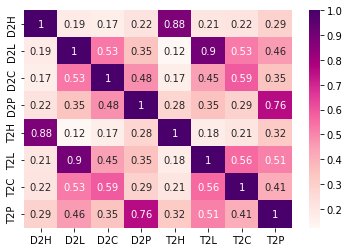

In [ ]:
cluster_variables=['D2H', 'D2L', 'D2C', 'D2P', 'T2H', 'T2L', 'T2C', 'T2P']
corr = Blocks[cluster_variables].corr()
seaborn.heatmap(corr, cmap="RdPu",annot=True)


In [ ]:
Blocks.head(2)

,OBJECTID,D2H,D2P,D2L,D2C,Population,geometry,T2H,T2C,T2L,T2P,Area,PDensity
0,1,8500,4418,7168,5913,0,"POLYGON ((51.78630 32.65793, 51.78624 32.65735...",440.1,429.1,342.2,352.6,3485.146757,0.00000
1,2,8555,4473,7222,5968,51,"POLYGON ((51.78757 32.65872, 51.78773 32.65863...",451.1,440.1,353.2,363.6,1863.366635,0.02737


In [ ]:
Blocks.to_file("MyBlocks.gpkg", driver="GPKG")

In [ ]:
!pip install geocube

In [ ]:
from geocube.api.core import make_geocube

In [ ]:
out_grid= make_geocube(vector_data=PrjBlocks, measurements=["PDensity"], resolution=(-16, 16)) #for most crs negative comes first in resolution

In [ ]:
out_grid["PDensity"].rio.to_raster("PDensity.tif")

In [ ]:
PrjBlocks = Blocks.to_crs("EPSG:32639")